In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [125]:
rumah123_df = pd.read_csv("../../data/rumah123_cleaned.csv")
rumah123_df.head()

,price,name,location,bedroom,bathroom,land_area,building_area
0,1680,Rumah Baru Gress Daerah Merr Dan Jalan Kembar ...,"Rungkut, Surabaya",3,3,67,120
1,950,Jual Rumah 2 Lantai Medokan Ayu Utara,"Medokan Ayu, Surabaya",3,3,72,140
2,500,Rumah Dekat Merr 500juta Di Wonorejo Rungkut,"Wonorejo, Surabaya",2,1,30,36
3,950,Cluster Baru Mewah Dekat Merr Oerr Dan Kampus,"Sukolilo, Surabaya",2,2,50,55
4,600,Perumahan Murah Kebraon Surabaya Selatan,"Kebraon, Surabaya",2,1,50,56


### EDA

In [126]:
rumah123_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37358 entries, 0 to 37357
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          37358 non-null  int64 
 1   name           37357 non-null  object
 2   location       37358 non-null  object
 3   bedroom        37358 non-null  int64 
 4   bathroom       37358 non-null  int64 
 5   land_area      37358 non-null  int64 
 6   building_area  37358 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.0+ MB


In [127]:
rumah123_df.drop(columns=["name"], inplace=True)

In [128]:
rumah123_df.describe()

,price,bedroom,bathroom,land_area,building_area
count,37358.000000,37358.000000,37358.000000,37358.000000,3.735800e+04
mean,1314.665962,3.004577,2.046362,184.845950,-5.732448e+04
std,1875.997903,1.326629,1.622460,7631.721945,1.111062e+07
min,200.000000,1.000000,1.000000,15.000000,-2.147484e+09
25%,795.000000,2.000000,1.000000,76.000000,7.000000e+01
50%,1300.000000,3.000000,2.000000,96.000000,1.050000e+02
75%,1700.000000,3.000000,3.000000,130.000000,1.500000e+02
max,165000.000000,120.000000,240.000000,910000.000000,5.000000e+05


### Cek Missing value

In [129]:
rumah123_df.isnull().sum()

price            0
location         0
bedroom          0
bathroom         0
land_area        0
building_area    0
dtype: int64

In [130]:
rumah123_df.dropna(inplace=True)

In [131]:
rumah123_df.isin(["", "-", " ", "   ", 0]).sum()

price            0
location         0
bedroom          0
bathroom         0
land_area        0
building_area    0
dtype: int64

### Cek Duplicate

In [132]:
rumah123_df.duplicated().sum()

14417

In [133]:
rumah123_df.drop_duplicates(inplace=True)
rumah123_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22941 entries, 0 to 37357
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          22941 non-null  int64 
 1   location       22941 non-null  object
 2   bedroom        22941 non-null  int64 
 3   bathroom       22941 non-null  int64 
 4   land_area      22941 non-null  int64 
 5   building_area  22941 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ MB


### Cek Multikolinieritas

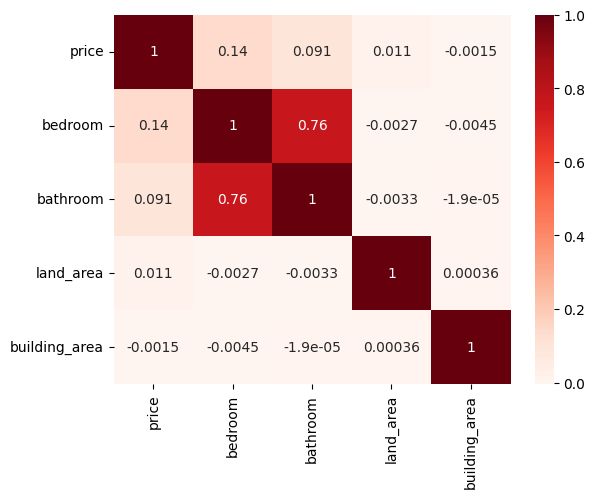

In [134]:
numerical_cols = rumah123_df.select_dtypes(include=["number"])

sns.heatmap(numerical_cols.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

### Plot Distribusi

In [135]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    print(variable)
    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title("Histogram")

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel("Variable quantiles")

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot")

    plt.show()

price


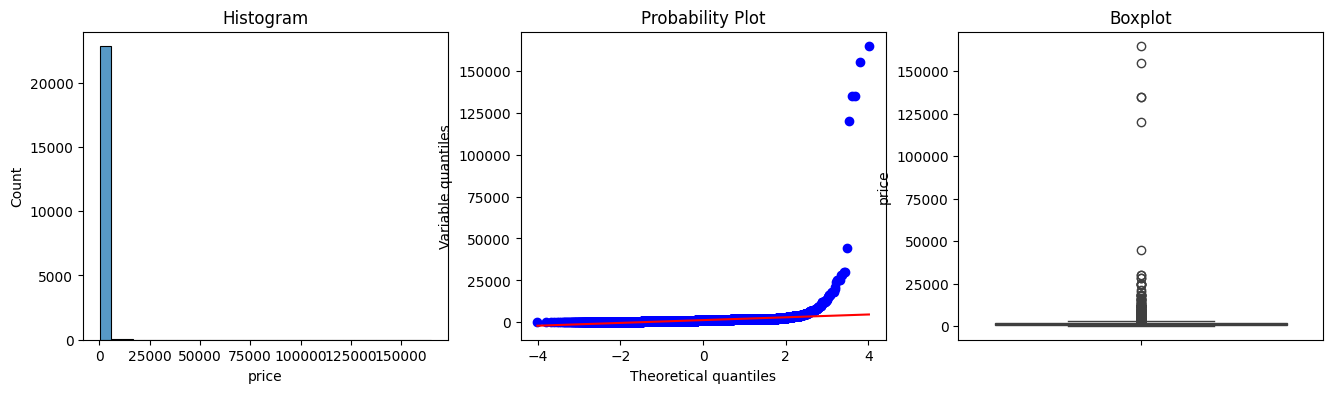

bedroom


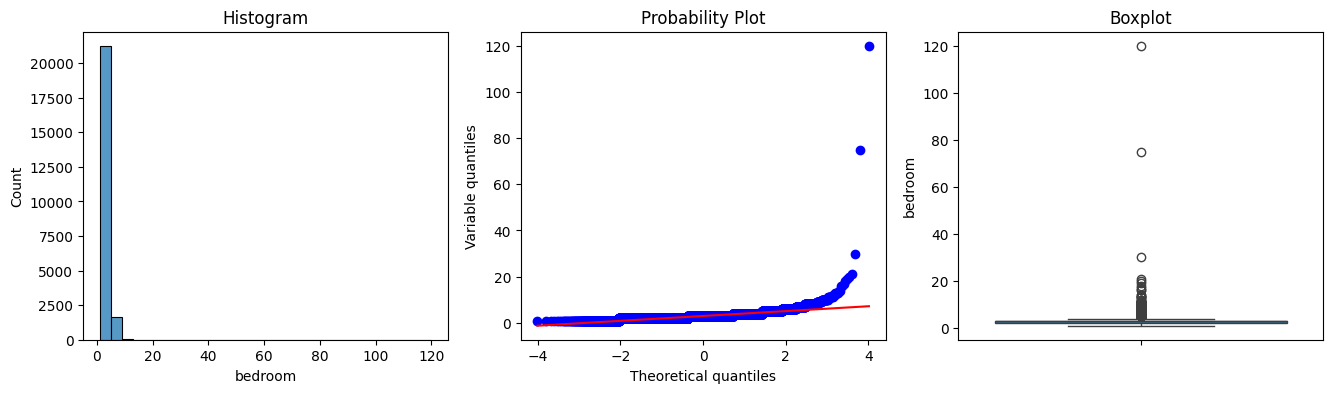

bathroom


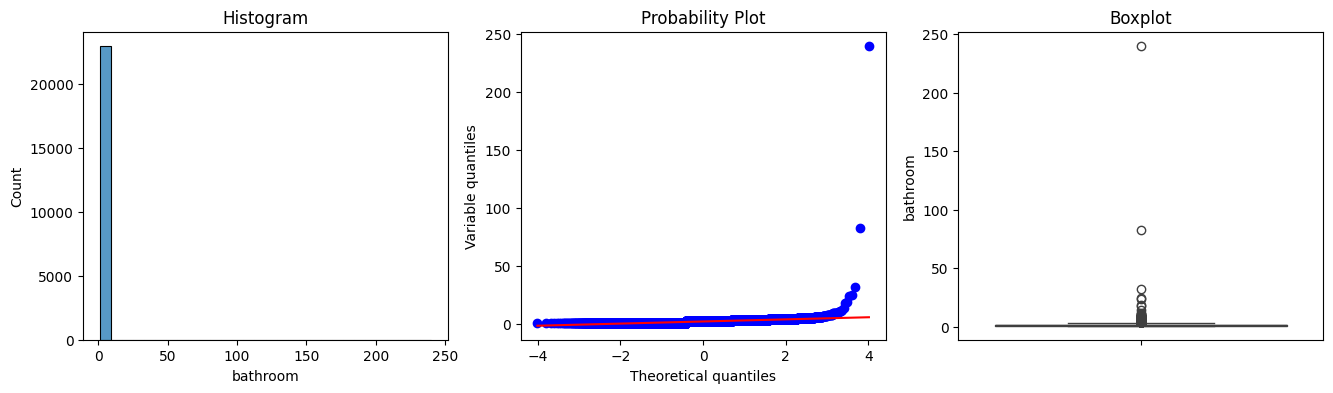

land_area


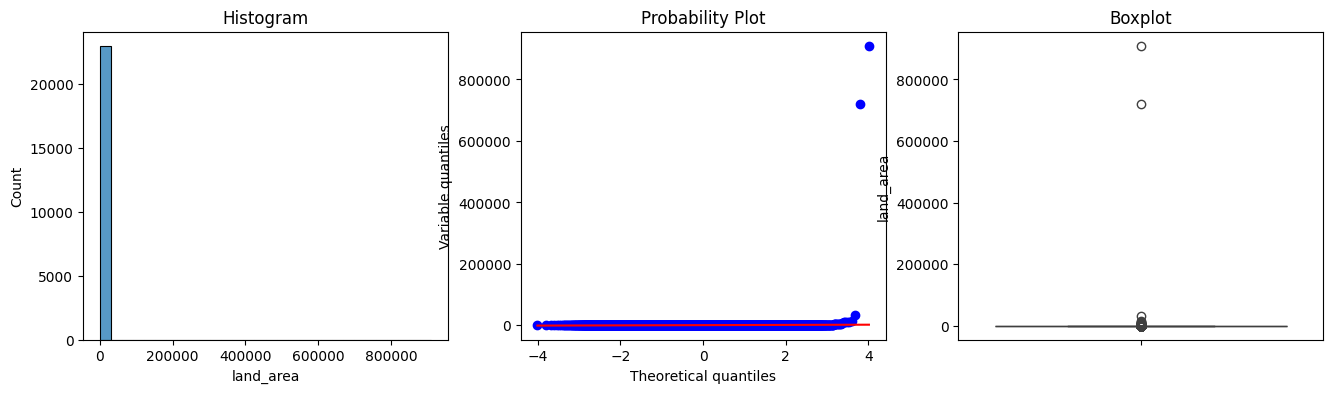

building_area


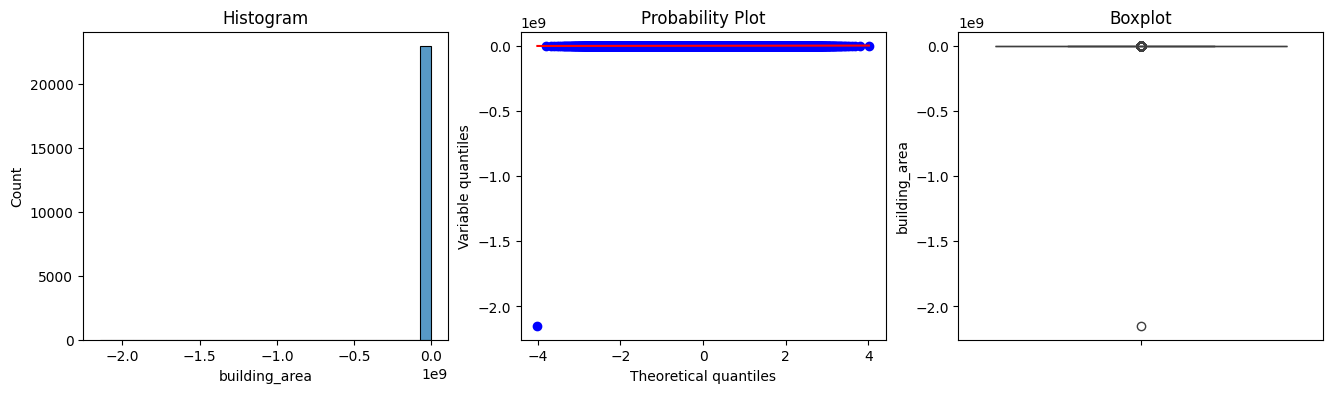

In [136]:
for col in numerical_cols.columns:
    check_plot(rumah123_df, col)

### Handling Outliers

In [137]:
def remove_outliers_iqr(df):

    # Pisahkan kolom numerik dan non-numerik
    numerical_df = df.select_dtypes(include=["number"])
    non_numerical_df = df.select_dtypes(exclude=["number"])

    # Hitung IQR hanya pada kolom numerik
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mask baris tanpa outlier
    mask = ~((numerical_df < lower_bound) | (numerical_df > upper_bound)).any(axis=1)

    # Gabungkan kembali kolom numerik dan non-numerik
    df_clean = pd.concat([numerical_df[mask], non_numerical_df[mask]], axis=1)

    # Hitung jumlah outlier
    total_rows = df.shape[0]
    kept_rows = mask.sum()
    outlier_count = total_rows - kept_rows

    return df_clean, outlier_count


rumah123_df, outlier_count = remove_outliers_iqr(rumah123_df)
print("jumlah data outlier :", outlier_count)

jumlah data outlier : 3302


price


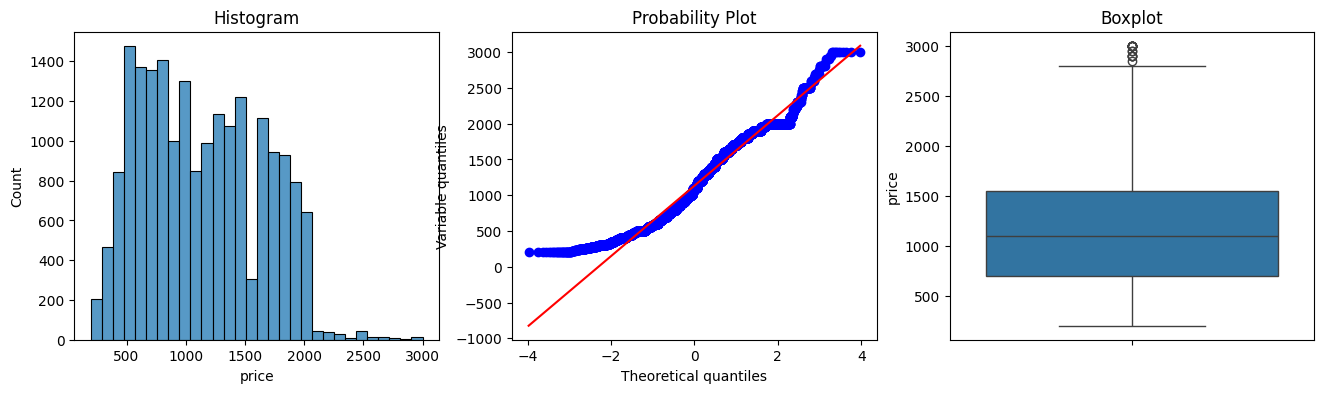

bedroom


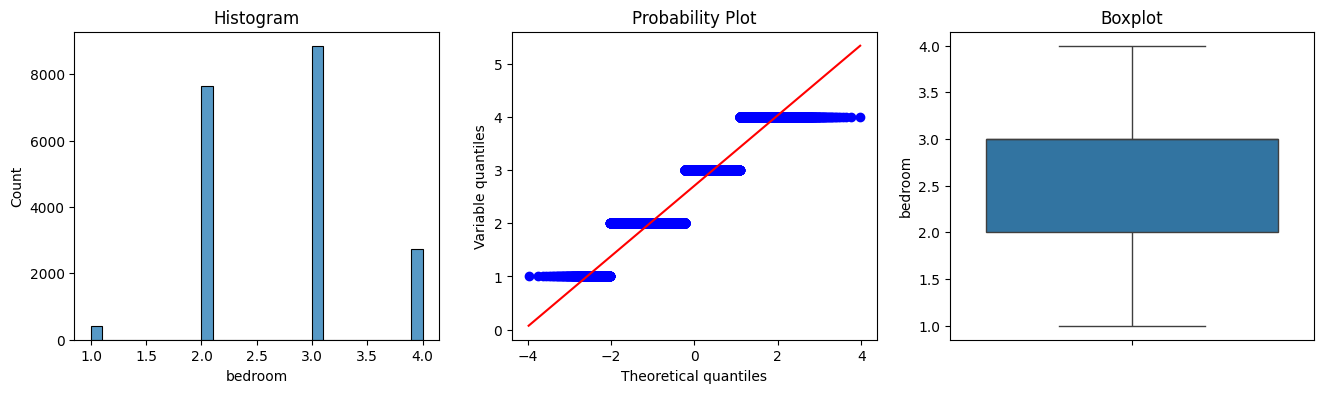

bathroom


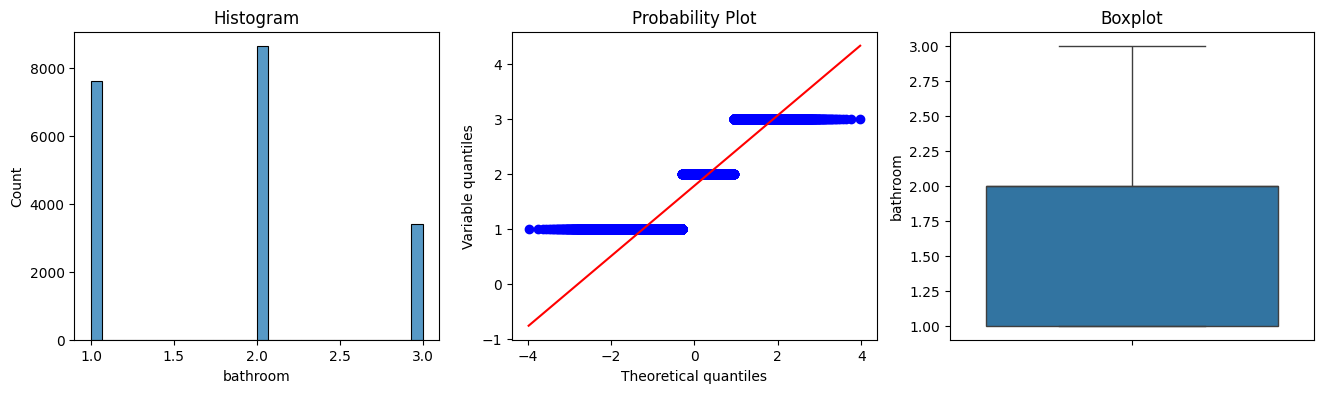

land_area


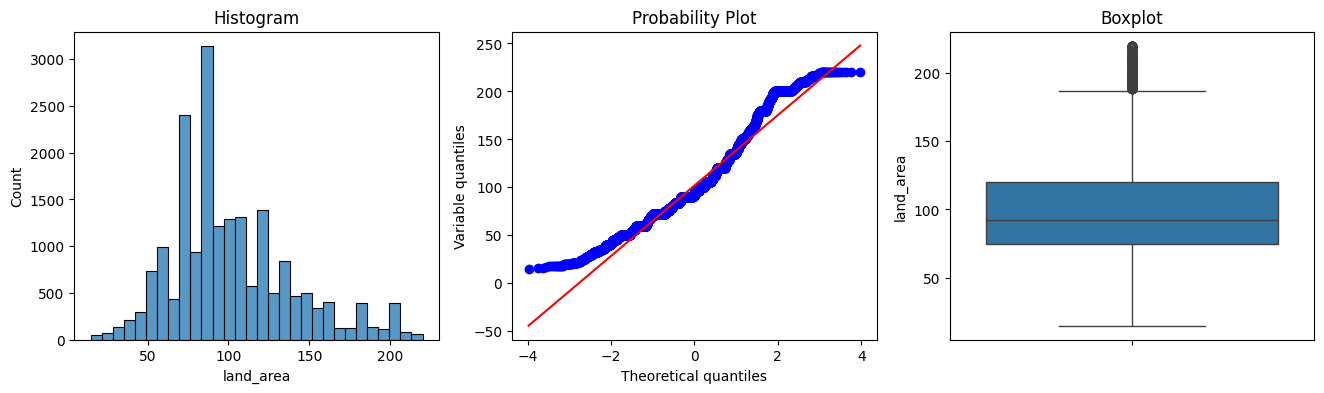

building_area


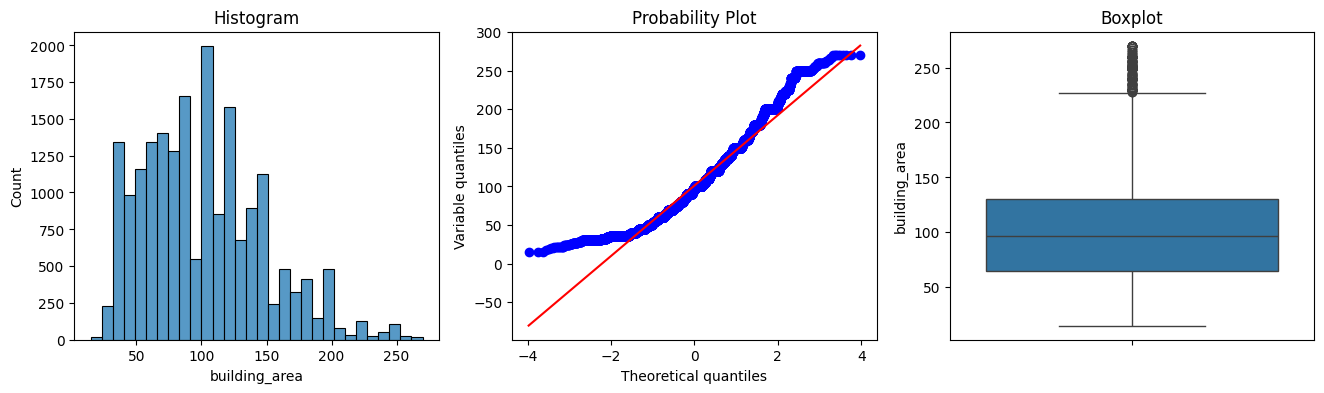

In [138]:
for col in numerical_cols.columns:
    check_plot(rumah123_df, col)

price


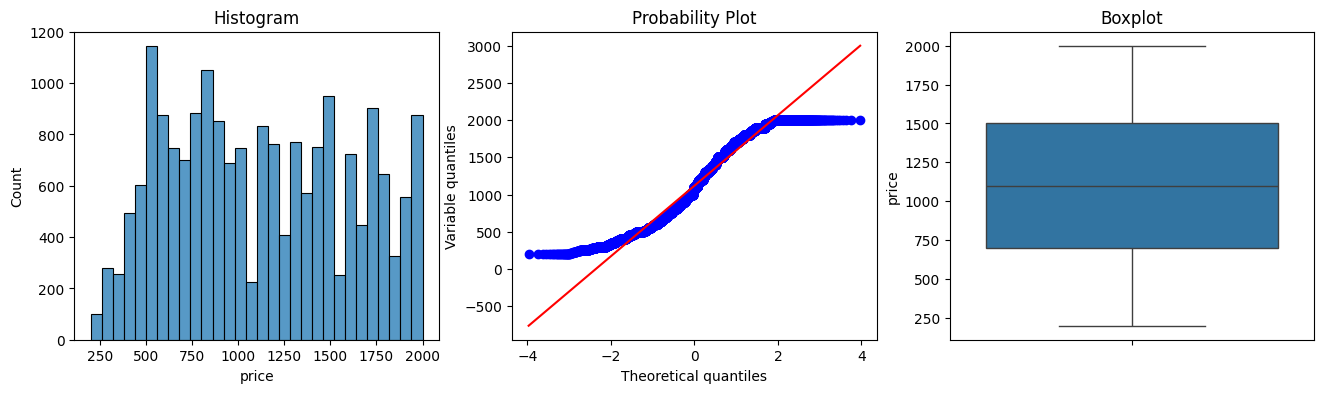

bedroom


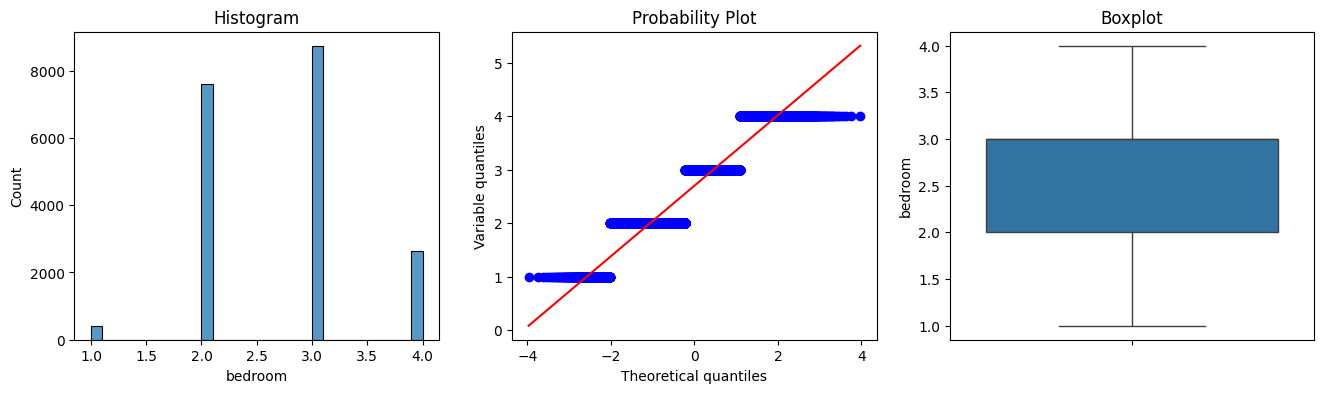

bathroom


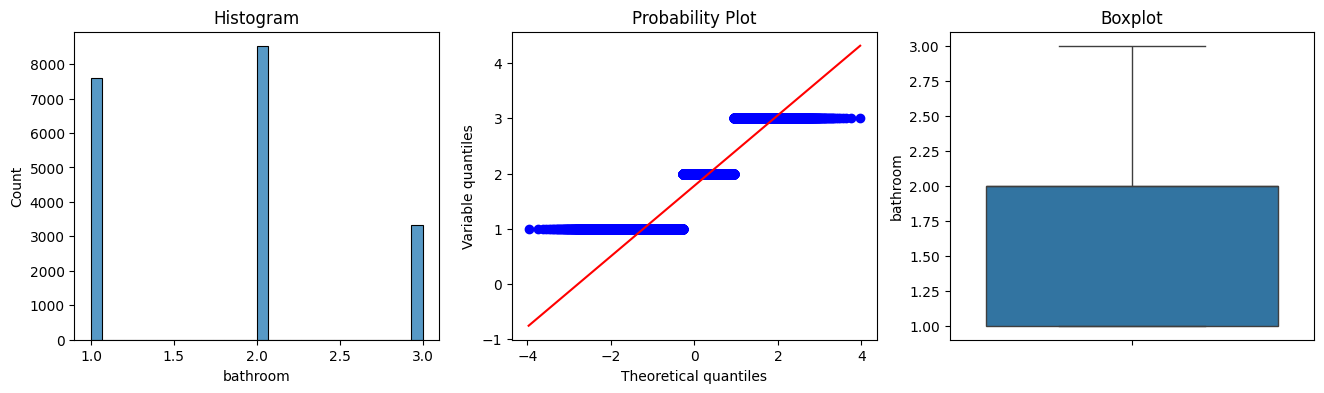

land_area


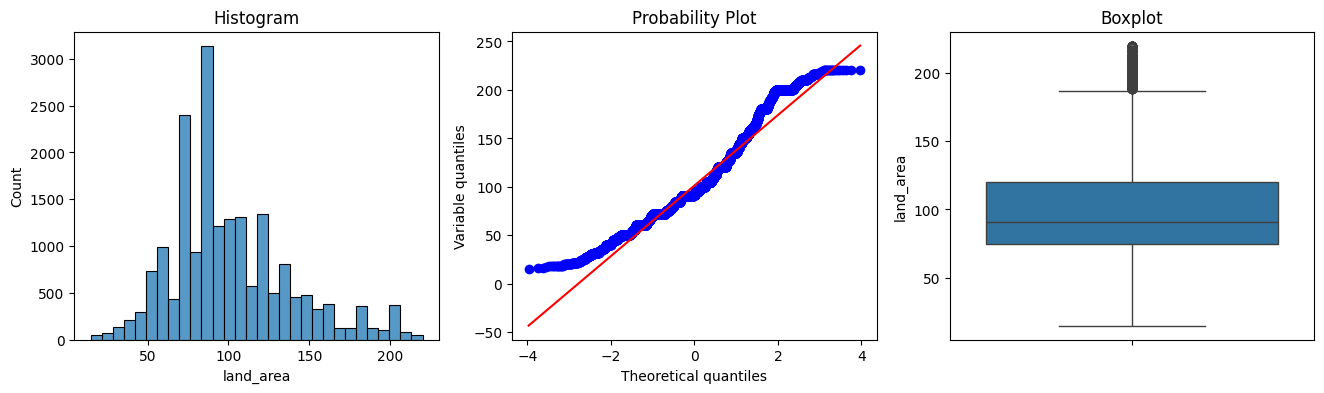

building_area


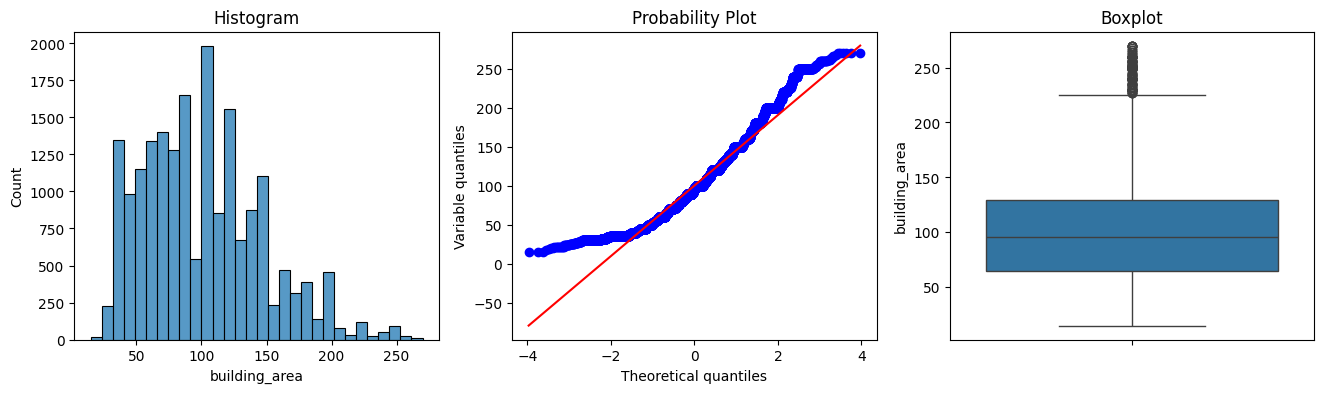

In [139]:
rumah123_df = rumah123_df.drop(rumah123_df[rumah123_df["price"] >= 2010].index)

for col in numerical_cols.columns:
    check_plot(rumah123_df, col)

#### Cek Multikolinieritas

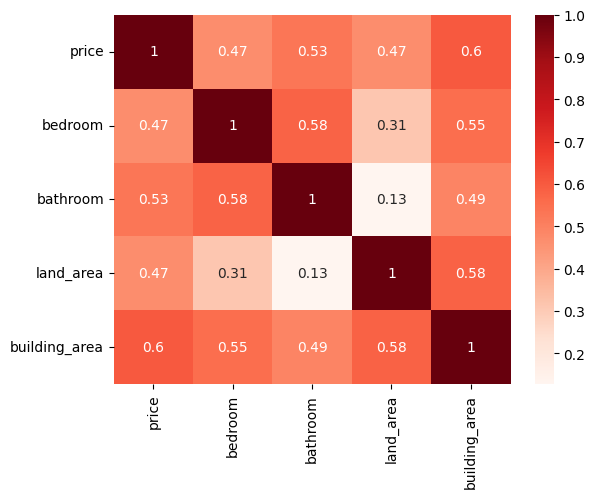

In [140]:
numerical_cols = rumah123_df.select_dtypes(include=["number"])

sns.heatmap(numerical_cols.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

### Batasan data lokasi yang sedikit

In [141]:
def boundary_n_col(df, col, n, text1, text2=np.nan):
    # Filter hanya data yang mengandung text1
    df_surabaya = df[df[col].str.contains(text1, na=False)]

    # Hitung jumlah kemunculan masing-masing lokasi
    counts = df_surabaya[col].value_counts()

    # Ambil lokasi dengan jumlah < n
    locations_to_replace = counts[counts < n].index

    # Ubah nilai location yang termasuk dalam daftar menjadi 'Surabaya'
    df.loc[df[col].isin(locations_to_replace), col] = text2

    return df

In [142]:
rumah123_df = boundary_n_col(rumah123_df, "location", 10, ", Surabaya", "Surabaya")
rumah123_df = boundary_n_col(rumah123_df, "location", 10, ", Gresik", "Gresik")
rumah123_df = boundary_n_col(rumah123_df, "location", 10, ", Sidoarjo", "Sidoarjo")

In [143]:
rumah123_df["location"].value_counts()

location
Rungkut, Surabaya             2107
Sidoarjo                      1659
Waru, Sidoarjo                1090
Wiyung, Surabaya               880
Gununganyar, Surabaya          834
                              ... 
Wringinanom, Gresik             11
Pakis, Surabaya                 11
Wisata Bukit Mas, Surabaya      10
Kendangsari, Surabaya           10
Margorejo, Surabaya             10
Name: count, Length: 94, dtype: int64

In [144]:
rumah123_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19421 entries, 0 to 37356
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          19421 non-null  int64 
 1   bedroom        19421 non-null  int64 
 2   bathroom       19421 non-null  int64 
 3   land_area      19421 non-null  int64 
 4   building_area  19421 non-null  int64 
 5   location       19421 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.0+ MB


In [145]:
rumah123_df.describe()

,price,bedroom,bathroom,land_area,building_area
count,19421.000000,19421.000000,19421.000000,19421.000000,19421.000000
mean,1118.515164,2.700891,1.780392,101.141342,100.373668
std,484.338109,0.725349,0.716525,37.301742,46.161396
min,200.000000,1.000000,1.000000,15.000000,15.000000
25%,700.000000,2.000000,1.000000,75.000000,65.000000
50%,1100.000000,3.000000,2.000000,91.000000,96.000000
75%,1500.000000,3.000000,2.000000,120.000000,129.000000
max,2000.000000,4.000000,3.000000,220.000000,270.000000


In [146]:
rumah123_df.to_csv("../../data/rumah123_ready.csv", index=False)